### SA on sentences w/ medication
http://textminingonline.com/dive-into-nltk-part-ix-from-text-classification-to-sentiment-analysis

In [8]:
# Trained with nltk movie_reviews

In [2]:
import nltk
from nltk.corpus import movie_reviews
from random import shuffle

In [3]:
documents = [(list(movie_reviews.words(fileid)), category) 
for category in movie_reviews.categories()
for fileid in movie_reviews.fileids(category)]

In [4]:
shuffle(documents)

In [6]:
print (documents[0])

(['let', 'me', 'begin', 'by', 'saying', 'that', 'this', 'is', 'easily', 'the', 'worst', 'movie', 'in', 'the', 'entire', 'official', '(', 'and', 'even', 'unofficial', ')', 'james', 'bond', 'series', '.', 'it', 'is', 'so', 'full', 'of', 'self', '-', 'parody', 'and', 'silly', 'characters', 'that', 'you', 'would', 'almost', 'believe', 'you', 'were', 'watching', 'a', 'spoof', '.', 'an', 'omen', 'of', 'what', 'is', 'to', 'come', 'is', 'provided', 'by', 'the', 'pre', '-', 'credits', 'sequence', ',', 'a', 'dull', 'affair', 'featuring', 'a', 'confrontation', 'between', 'a', 'man', '(', 'it', "'", 's', 'difficult', 'to', 'give', 'a', 'better', 'description', 'since', 'no', 'mention', 'of', 'him', 'is', 'made', 'elsewhere', 'in', 'the', 'movie', ')', 'and', 'the', 'assassin', 'of', 'the', 'title', '.', 'a', 'song', 'with', 'woefully', 'terrible', 'lyrics', 'follows', ',', 'and', 'the', 'rest', 'of', 'the', 'movie', 'is', 'even', 'worse', '.', 'the', 'plot', 'might', 'have', 'been', 'a', 'pleasant

In [7]:
len(documents)

2000

In [9]:
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())

In [16]:
# word_features = all_words.keys()[:2000]
word_features = list(all_words.keys())[:2000]

In [17]:
def document_features(document):
   ....:     document_words = set(document)
   ....:     features = {}
   ....:     for word in word_features:
   ....:         features['contains(%s)' % word] = (word in document_words)
   ....:     return features

In [19]:
print (document_features(movie_reviews.words('pos/cv957_8737.txt')))

{'contains(plot)': True, 'contains(:)': True, 'contains(two)': True, 'contains(teen)': False, 'contains(couples)': False, 'contains(go)': False, 'contains(to)': True, 'contains(a)': True, 'contains(church)': False, 'contains(party)': False, 'contains(,)': True, 'contains(drink)': False, 'contains(and)': True, 'contains(then)': True, 'contains(drive)': False, 'contains(.)': True, 'contains(they)': True, 'contains(get)': True, 'contains(into)': True, 'contains(an)': True, 'contains(accident)': False, 'contains(one)': True, 'contains(of)': True, 'contains(the)': True, 'contains(guys)': False, 'contains(dies)': False, 'contains(but)': True, 'contains(his)': True, 'contains(girlfriend)': True, 'contains(continues)': False, 'contains(see)': False, 'contains(him)': True, 'contains(in)': True, 'contains(her)': False, 'contains(life)': False, 'contains(has)': True, 'contains(nightmares)': False, 'contains(what)': True, "contains(')": True, 'contains(s)': True, 'contains(deal)': False, 'contains

In [21]:
featuresets = [(document_features(d), c) for (d, c) in documents]

In [22]:
train_set, test_set = featuresets[100:], featuresets[:100]

In [23]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [25]:
print (nltk.classify.accuracy(classifier, test_set))

0.83


In [26]:
classifier.show_most_informative_features(10)

Most Informative Features
 contains(unimaginative) = True              neg : pos    =      8.4 : 1.0
      contains(illusion) = True              neg : pos    =      7.7 : 1.0
    contains(schumacher) = True              neg : pos    =      7.4 : 1.0
        contains(shoddy) = True              neg : pos    =      7.0 : 1.0
     contains(atrocious) = True              neg : pos    =      7.0 : 1.0
        contains(turkey) = True              neg : pos    =      6.4 : 1.0
        contains(suvari) = True              neg : pos    =      6.4 : 1.0
          contains(mena) = True              neg : pos    =      6.4 : 1.0
       contains(singers) = True              pos : neg    =      6.3 : 1.0
           contains(ugh) = True              neg : pos    =      5.8 : 1.0


### test

In [31]:
from nltk import tokenize
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import pandas as pd
import gensim
import nltk
import numbers

In [59]:
df1 = pd.read_csv('s_med.csv')

In [60]:
sent_a = list(df1['colummn'].values)

In [71]:
res_s_dic = []
res_s_dic1 = []


for sentence in sent_a:
    test_set = document_features(sentence.split())
    # res_s_dic1.append(classifier.classify(test_set))
    
    prob_result = classifier.prob_classify(test_set)
    
    dic = {}
    dic["neg"] = prob_result.prob("neg")
    dic["pos"] = prob_result.prob("pos")
    
    res_s_dic.append(dic)
    
print (res_s_dic)

[{'neg': 0.9992445021180179, 'pos': 0.0007554978819638692}, {'neg': 0.9999242733823677, 'pos': 7.572661764891732e-05}, {'neg': 0.9987323541921564, 'pos': 0.0012676458078445098}, {'neg': 0.9999661045618001, 'pos': 3.3895438186644914e-05}, {'neg': 0.9999667069204794, 'pos': 3.329307953009196e-05}, {'neg': 0.9999710175469357, 'pos': 2.8982453071155877e-05}, {'neg': 0.9999731904211215, 'pos': 2.6809578860901487e-05}, {'neg': 0.9994868513893924, 'pos': 0.0005131486106022341}, {'neg': 0.9999425590611338, 'pos': 5.744093888369822e-05}, {'neg': 0.9999769282658207, 'pos': 2.3071734168401247e-05}, {'neg': 0.9988808673349145, 'pos': 0.0011191326650661433}, {'neg': 0.9999543232605332, 'pos': 4.567673948216269e-05}, {'neg': 0.9999680188101542, 'pos': 3.198118986456804e-05}, {'neg': 0.9999788143833431, 'pos': 2.118561663703421e-05}, {'neg': 0.9999555179218206, 'pos': 4.448207819016867e-05}, {'neg': 0.9993912417556845, 'pos': 0.0006087582443276642}, {'neg': 0.9998508486530123, 'pos': 0.00014915134700

In [72]:
df_res_s = pd.DataFrame(res_s_dic)
print (df_res_s)

            neg       pos
0      0.999245  0.000755
1      0.999924  0.000076
2      0.998732  0.001268
3      0.999966  0.000034
4      0.999967  0.000033
5      0.999971  0.000029
6      0.999973  0.000027
7      0.999487  0.000513
8      0.999943  0.000057
9      0.999977  0.000023
10     0.998881  0.001119
11     0.999954  0.000046
12     0.999968  0.000032
13     0.999979  0.000021
14     0.999956  0.000044
15     0.999391  0.000609
16     0.999851  0.000149
17     0.999966  0.000034
18     0.999985  0.000015
19     0.999731  0.000269
20     0.999948  0.000052
21     0.997216  0.002784
22     0.999982  0.000018
23     0.999839  0.000161
24     0.999899  0.000101
25     0.999930  0.000070
26     0.999178  0.000822
27     0.999644  0.000356
28     0.999843  0.000157
29     0.999846  0.000154
...         ...       ...
37679  0.999116  0.000884
37680  0.998549  0.001451
37681  0.999966  0.000034
37682  0.999939  0.000061
37683  0.998988  0.001012
37684  0.999942  0.000058
37685  0.999

In [69]:
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

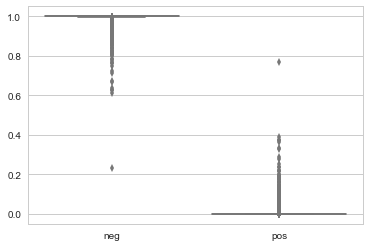

In [73]:
ax = sns.boxplot(data= df_res_s,palette="PRGn")

#### posts

In [63]:
df2 = pd.read_csv('p_med.csv')

In [64]:
post_a = list(df2['selftext'].values)

In [66]:
res_p_dic = []
res_p_dic1 = []


for p in post_a:
    test_set = document_features(str(p).split())
    # res_s_dic1.append(classifier.classify(test_set))
    
    prob_result = classifier.prob_classify(test_set)
    
    dic = {}
    dic["neg"] = prob_result.prob("neg")
    dic["pos"] = prob_result.prob("pos")
    
    res_p_dic.append(dic)
    
print (res_p_dic)

[{'neg': 0.9854221666799412, 'pos': 0.014577833320073431}, {'neg': 0.9927396924647348, 'pos': 0.007260307535278866}, {'neg': 0.9964260630883561, 'pos': 0.0035739369116362294}, {'neg': 0.7131731001983792, 'pos': 0.2868268998016249}, {'neg': 0.9999884782685219, 'pos': 1.1521731474278047e-05}, {'neg': 0.9961934185919811, 'pos': 0.0038065814080292986}, {'neg': 0.9961389301090118, 'pos': 0.0038610698910021748}, {'neg': 0.9898231596429667, 'pos': 0.010176840357051957}, {'neg': 0.4914217751060456, 'pos': 0.5085782248939642}, {'neg': 0.17326777386597472, 'pos': 0.8267322261340081}, {'neg': 0.9970877908690335, 'pos': 0.0029122091309780537}, {'neg': 0.1704413003506735, 'pos': 0.8295586996493032}, {'neg': 0.9945955475164948, 'pos': 0.005404452483503165}, {'neg': 0.99979009008798, 'pos': 0.00020990991202632137}, {'neg': 0.7610048594727884, 'pos': 0.23899514052720577}, {'neg': 0.9863082265130735, 'pos': 0.013691773486939925}, {'neg': 0.9672772463164262, 'pos': 0.032722753683589324}, {'neg': 0.99385

In [67]:
df_res_p = pd.DataFrame(res_p_dic)
print (df_res_p)

           neg       pos
0     0.985422  0.014578
1     0.992740  0.007260
2     0.996426  0.003574
3     0.713173  0.286827
4     0.999988  0.000012
5     0.996193  0.003807
6     0.996139  0.003861
7     0.989823  0.010177
8     0.491422  0.508578
9     0.173268  0.826732
10    0.997088  0.002912
11    0.170441  0.829559
12    0.994596  0.005404
13    0.999790  0.000210
14    0.761005  0.238995
15    0.986308  0.013692
16    0.967277  0.032723
17    0.993854  0.006146
18    0.996148  0.003852
19    0.999488  0.000512
20    0.981405  0.018595
21    0.860022  0.139978
22    0.999976  0.000024
23    0.986723  0.013277
24    0.004602  0.995398
25    0.999943  0.000057
26    0.999740  0.000260
27    0.971807  0.028193
28    0.999799  0.000201
29    0.996179  0.003821
...        ...       ...
8983  0.998021  0.001979
8984  0.990463  0.009537
8985  0.969291  0.030709
8986  0.984975  0.015025
8987  0.999720  0.000280
8988  0.999328  0.000672
8989  0.678548  0.321452
8990  0.999686  0.000314


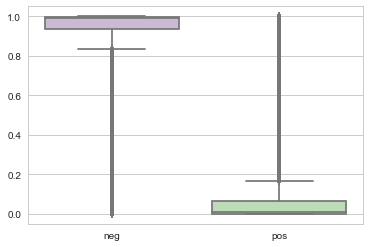

In [70]:
ax_2 = sns.boxplot(data= df_res_p,palette="PRGn")